In [1]:
import sqlite3
import pandas as pd


In [2]:
# Creates a temporary in-memory database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


In [4]:
from google.colab import files
uploaded = files.upload()


Saving orders.csv.csv to orders.csv.csv


In [5]:
# Replace 'your_file.csv' with your actual uploaded filename
df = pd.read_csv('orders.csv.csv')
df.head()


,order_id,order_dow,order_hour_of_day,days_since_prior_order,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1597,1,8,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,4,10,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2822,0,8,29,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,2
3,2889,1,15,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3971,2,18,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Create a SQL table named 'data_table' from the DataFrame
df.to_sql('data_table', conn, index=False, if_exists='replace')


5000

In [7]:
# Example SQL query: Select all data
query = "SELECT * FROM data_table LIMIT 5"
result = pd.read_sql(query, conn)
result


,order_id,order_dow,order_hour_of_day,days_since_prior_order,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1597,1,8,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2011,4,10,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2822,0,8,29,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,2
3,2889,1,15,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,3971,2,18,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check column names in the table
df.columns


Index(['order_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'air fresheners candles', 'asian foods', 'baby accessories',
       'baby bath body care', 'baby food formula', 'bakery desserts',
       ...
       'spreads', 'tea', 'tofu meat alternatives', 'tortillas flat bread',
       'trail mix snack mix', 'trash bags liners', 'vitamins supplements',
       'water seltzer sparkling water', 'white wines', 'yogurt'],
      dtype='object', length=138)

In [10]:
pd.read_sql("SELECT COUNT(*) as total_orders FROM data_table", conn)


,total_orders
0,5000


In [11]:
pd.read_sql("SELECT AVG(order_hour_of_day) as avg_hour FROM data_table", conn)


,avg_hour
0,13.5998


In [12]:
pd.read_sql("""
SELECT order_dow, COUNT(*) as order_count
FROM data_table
GROUP BY order_dow
ORDER BY order_dow
""", conn)


,order_dow,order_count
0,0,1015
1,1,724
2,2,651
3,3,619
4,4,629
5,5,679
6,6,683


In [13]:
# Example: top 5 categories by total amount ordered
product_columns = df.columns[4:]  # skipping first 4 meta columns

# Sum all categories
category_totals = df[product_columns].sum().sort_values(ascending=False)
category_totals.head(5)


,0
fresh fruits,5768
fresh vegetables,5762
packaged vegetables fruits,2980
yogurt,2172
packaged cheese,1523


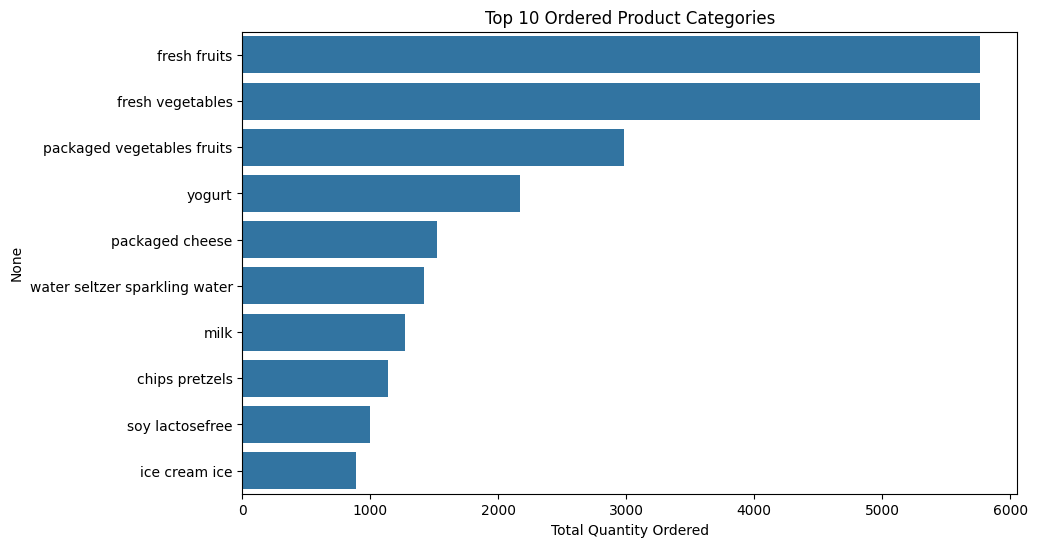

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of top 10 most purchased categories
top10 = category_totals.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Ordered Product Categories")
plt.xlabel("Total Quantity Ordered")
plt.show()
